In [1]:
import warnings
warnings.filterwarnings("ignore")

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('rishisunak.csv', 'r', encoding='utf-8') as file:
    text_content = file.read()

print(text_content)


Good morning,
I have just been to Buckingham Palace and accepted His Majesty The King’s invitation to form a government in his name.
It is only right to explain why I am standing here as your new Prime Minister.
Right now our country is facing a profound economic crisis. 
The aftermath of Covid still lingers. 
Putin’s war in Ukraine has destabilised energy markets and supply chains the world over.
I want to pay tribute to my predecessor Liz Truss, she was not wrong to want to improve growth in this country, it is a noble aim. 
And I admired her restlessness to create change.
But some mistakes were made. 
Not borne of ill will or bad intentions. Quite the opposite, in fact. But mistakes nonetheless. 
And I have been elected as leader of my party, and your Prime Minister, in part, to fix them.
And that work begins immediately.
I will place economic stability and confidence at the heart of this government’s agenda. 
This will mean difficult decisions to come.
But you saw me during Covid, 

# Data Cleaning or Pre-Processing

# Step 1 :- Lower case

In [3]:
text = text_content.lower()
print (text)

good morning,
i have just been to buckingham palace and accepted his majesty the king’s invitation to form a government in his name.
it is only right to explain why i am standing here as your new prime minister.
right now our country is facing a profound economic crisis. 
the aftermath of covid still lingers. 
putin’s war in ukraine has destabilised energy markets and supply chains the world over.
i want to pay tribute to my predecessor liz truss, she was not wrong to want to improve growth in this country, it is a noble aim. 
and i admired her restlessness to create change.
but some mistakes were made. 
not borne of ill will or bad intentions. quite the opposite, in fact. but mistakes nonetheless. 
and i have been elected as leader of my party, and your prime minister, in part, to fix them.
and that work begins immediately.
i will place economic stability and confidence at the heart of this government’s agenda. 
this will mean difficult decisions to come.
but you saw me during covid, 

# Remove url

* \S == Returns a match where the string DOES NOT contain a white space character ( http / www.)
* (+) == one or more occurance

In [4]:
import re

#text_content = "Your text with URLs http://example.com and www.example.com"

# Replace URLs with an empty string
text_content = re.sub(r'http\S+|www.\S+', '', text, flags=re.IGNORECASE)

# Display the modified text
print(text_content)


good morning,
i have just been to buckingham palace and accepted his majesty the king’s invitation to form a government in his name.
it is only right to explain why i am standing here as your new prime minister.
right now our country is facing a profound economic crisis. 
the aftermath of covid still lingers. 
putin’s war in ukraine has destabilised energy markets and supply chains the world over.
i want to pay tribute to my predecessor liz truss, she was not wrong to want to improve growth in this country, it is a noble aim. 
and i admired her restlessness to create change.
but some mistakes were made. 
not borne of ill will or bad intentions. quite the opposite, in fact. but mistakes nonetheless. 
and i have been elected as leader of my party, and your prime minister, in part, to fix them.
and that work begins immediately.
i will place economic stability and confidence at the heart of this government’s agenda. 
this will mean difficult decisions to come.
but you saw me during covid, 

# Step 2 :- Punctuation

In [5]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
import string

def remove_punctuation(text):
    # Create a translation table to map punctuation characters to None
    translator = str.maketrans('', '', string.punctuation)
    
    # Use translate to remove punctuation
    text_without_punctuation = text.translate(translator)
    
    return text_without_punctuation

# Example usage:
#text_with_punctuation = "Hello, world! This is an example text with punctuation."
text_content = remove_punctuation(text_content)

#print("Original text:", text_with_punctuation)
print("Text without punctuation:", text_content)


Text without punctuation: good morning
i have just been to buckingham palace and accepted his majesty the king’s invitation to form a government in his name
it is only right to explain why i am standing here as your new prime minister
right now our country is facing a profound economic crisis 
the aftermath of covid still lingers 
putin’s war in ukraine has destabilised energy markets and supply chains the world over
i want to pay tribute to my predecessor liz truss she was not wrong to want to improve growth in this country it is a noble aim 
and i admired her restlessness to create change
but some mistakes were made 
not borne of ill will or bad intentions quite the opposite in fact but mistakes nonetheless 
and i have been elected as leader of my party and your prime minister in part to fix them
and that work begins immediately
i will place economic stability and confidence at the heart of this government’s agenda 
this will mean difficult decisions to come
but you saw me during cov

# Removing Stop Words

In [7]:
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Akshay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the stopwords dataset
nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(text_content):
    # Tokenize the text into words
    words = word_tokenize(text_content)
    
    # Remove stopwords
    filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]
    
    # Reconstruct the text without stopwords
    text_without_stopwords = ' '.join(filtered_words)
    
    return text_without_stopwords

# Example usage:
text_with_stopwords = (text_content)
text_content = remove_stopwords(text_content)

#print("Original text:", text_with_stopwords)
print("Text without stopwords:", text_content)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Akshay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Akshay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Text without stopwords: good morning buckingham palace accepted majesty king ’ invitation form government name right explain standing new prime minister right country facing profound economic crisis aftermath covid still lingers putin ’ war ukraine destabilised energy markets supply chains world want pay tribute predecessor liz truss wrong want improve growth country noble aim admired restlessness create change mistakes made borne ill bad intentions quite opposite fact mistakes nonetheless elected leader party prime minister part fix work begins immediately place economic stability confidence heart government ’ agenda mean difficult decisions come saw covid everything could protect people businesses schemes like furlough always limits ever promise bring compassion challenges face today government lead leave next generation children grandchildren debt settle weak pay unite country words action work day day deliver government integrity professionalism accountability every level trust ear

# Common Words

* manually created as per the case study

In [9]:
import re # replace of words
nltk.download('words') # downloading dictionary of nltk  
words = set(nltk.corpus.words.words()) # corpus & set array 
words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Akshay\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


{'omniactive',
 'pondful',
 'exalbuminous',
 'undissolvable',
 'Clathraceae',
 'dismality',
 'overpopular',
 'Maya',
 'disexcommunicate',
 'preachment',
 'rehybridize',
 'Sarzan',
 'subtropics',
 'archvillain',
 'geodynamic',
 'hyperemic',
 'Zachariah',
 'Columbia',
 'scombrine',
 'shirtlike',
 'bulletheaded',
 'epithetic',
 'pelecypodous',
 'Bermudian',
 'outstood',
 'wisen',
 'circularwise',
 'microsphaeric',
 'diaminogen',
 'unfellied',
 'unsubstantiated',
 'dracunculus',
 'subrace',
 'rubber',
 'niceness',
 'juloid',
 'fogou',
 'gonotheca',
 'Wezn',
 'Triphora',
 'rascally',
 'underlineation',
 'nonappearer',
 'Bouteloua',
 'anthropophilous',
 'electrotonic',
 'decitizenize',
 'tragicality',
 'furnage',
 'pregolden',
 'procatalepsis',
 'pericolpitis',
 'onerary',
 'variolization',
 'Stone',
 'clotty',
 'deadener',
 'unjam',
 'balandra',
 'hump',
 'dermatograph',
 'unglossed',
 'Carpodacus',
 'subglobulose',
 'Caleb',
 'chronoscopy',
 'aposporous',
 'albinism',
 'attently',
 'cool',

In [10]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text =  re.sub('party|create|government|prime minister', '', text) 
    text =  re.sub('covid|work|mandate|country','', text)
    text =  re.sub('Patient|mistake','', text) 
    text =  re.sub(r"\b[a-zA-Z]\b", "", text) 
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)  
    text =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(text)  ## this will give you tokens 
                      if w.lower() in words)  #    
    return text
text_content = clean_text_round2(text_content)

In [11]:
# Let's take a look at the updated text
#df= pd.DataFrame(df.text.apply(lambda x: clean_text_round2(x)))
text_content

'good morning palace accepted majesty king invitation form name right explain standing new right facing profound economic crisis aftermath still war energy supply world want pay tribute predecessor truss wrong want improve growth noble aim admired restlessness change made borne ill bad quite opposite fact nonetheless leader part fix immediately place economic stability confidence heart agenda mean difficult come saw everything could protect people like furlough always ever promise bring compassion face today lead leave next generation debt settle weak pay unite action day day deliver integrity professionalism accountability every level trust earn always grateful incredible treasure warmth generosity spirit know would agree sole property one individual heart manifesto deliver promise better streets control protecting environment supporting armed building economy invest innovate understand difficult moment cost combat dislocation midst terrible war must seen successfully fully appreciate

In [12]:
def remove_common_words(text, common_words):
    # Tokenize the text into words
    words = word_tokenize(text_content)
    
    # Remove common words
    filtered_words = [word for word in words if word.lower() not in common_words]
    
    # Reconstruct the text without common words
    text_without_common_words = ' '.join(filtered_words)
    
    return text_without_common_words

# Example usage:
#text_with_common_words = "This is an example sentence with some common words like 'is', 'an', and 'with'."
common_words_to_remove = ['party', 'government', 'prime minister','country']

text_content = remove_common_words(text_content, common_words_to_remove)

#print("Original text:", text_with_common_words)
print("Text without common words:", text_content)


Text without common words: good morning palace accepted majesty king invitation form name right explain standing new right facing profound economic crisis aftermath still war energy supply world want pay tribute predecessor truss wrong want improve growth noble aim admired restlessness change made borne ill bad quite opposite fact nonetheless leader part fix immediately place economic stability confidence heart agenda mean difficult come saw everything could protect people like furlough always ever promise bring compassion face today lead leave next generation debt settle weak pay unite action day day deliver integrity professionalism accountability every level trust earn always grateful incredible treasure warmth generosity spirit know would agree sole property one individual heart manifesto deliver promise better streets control protecting environment supporting armed building economy invest innovate understand difficult moment cost combat dislocation midst terrible war must seen suc

# Lemmatization

In [13]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Akshay\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [14]:
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download the necessary resources
nltk.download('punkt')
nltk.download('wordnet')

def lemmatize_text(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize each word
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]
    
    # Reconstruct the text with lemmatized words
    text_lemmatized = ' '.join(lemmatized_words)
    
    return text_lemmatized

def get_wordnet_pos(word):
    # Map POS tag to first character lemmatize() accepts
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    
    return tag_dict.get(tag, wordnet.NOUN)

# Example usage:
#text_to_lemmatize = "This is an example sentence with some words like 'running', 'better', and 'happily'."

text_content = lemmatize_text(text_content)

#print("Original text:", text_to_lemmatize)
print("Text after lemmatization:", text_content)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Akshay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Akshay\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Text after lemmatization: good morning palace accepted majesty king invitation form name right explain stand new right face profound economic crisis aftermath still war energy supply world want pay tribute predecessor truss wrong want improve growth noble aim admire restlessness change make borne ill bad quite opposite fact nonetheless leader part fix immediately place economic stability confidence heart agenda mean difficult come saw everything could protect people like furlough always ever promise bring compassion face today lead leave next generation debt settle weak pay unite action day day deliver integrity professionalism accountability every level trust earn always grateful incredible treasure warmth generosity spirit know would agree sole property one individual heart manifesto deliver promise well street control protect environment support arm building economy invest innovate understand difficult moment cost combat dislocation midst terrible war must see successfully fully app

###  Finished Data Cleaning

# Term Document Matrix

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Assuming you have preprocessed and lemmatized text content in a variable 'lemmatized_text'
documents = [text_content]

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit and transform the documents
X = vectorizer.fit_transform(documents)

# Convert the matrix to a DataFrame for better visualization
tdm_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the Term-Document Matrix
print(tdm_df)


   accepted  accountability  achieve  action  admire  aftermath  agenda  \
0         2               1        1       1       1          1       1   

   agree  aim  along  ...  want  war  warmth  weak  well  willingness  world  \
0      1    1      1  ...     2    2       1     1     1            1      1   

   worthy  would  wrong  
0       1      1      1  

[1 rows x 152 columns]


In [16]:
tdm = tdm_df.transpose()
tdm

,0
accepted,2
accountability,1
achieve,1
action,1
admire,1
...,...
willingness,1
world,1
worthy,1
would,1


In [17]:
tdm['freq'] = tdm.sum(axis=1)

tdm.head()

,0,freq
accepted,2,2
accountability,1,1
achieve,1,1
action,1,1
admire,1,1


In [18]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,freq
0,accepted,2,2
1,accountability,1,1
2,achieve,1,1
3,action,1,1
4,admire,1,1


In [19]:
tdm1 = tdm[["index","freq"]]
tdm1.rename(columns = {'index':'Word'}, inplace = True)
tdm1.sort_values(by='freq',ascending=False,inplace=True)
tdm1

,Word,freq
0,accepted,2
34,economic,2
21,come,2
63,incredible,2
28,day,2
...,...,...
47,form,1
46,fix,1
45,fill,1
44,fact,1


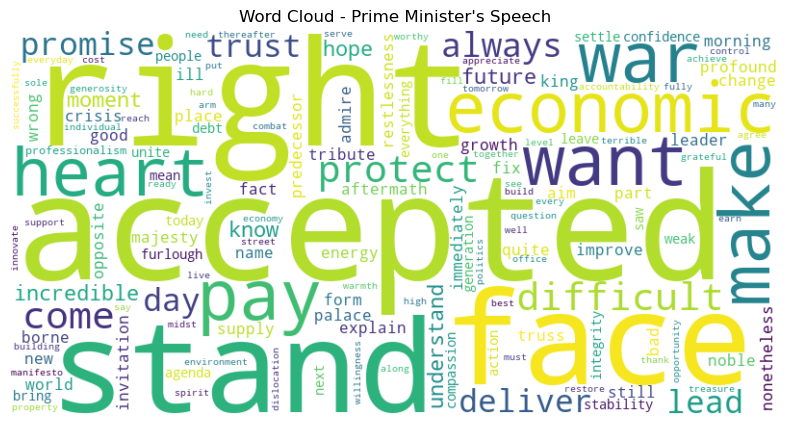

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(text_content)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Prime Minister's Speech")

# Save the Word Cloud image
plt.savefig('wordcloud_pm_speech.png', bbox_inches='tight')
plt.show()


# Finish